# StarCMM+ Data Analysis #

Data analysis of StarCCM+ used for validation purposes. 

Test case parameters:

<b> Dimensions:<b/>
- Pipe Radius $R_t = 1$ mm 
- Pipe Length $L = 0.1$ m
    
<b> Boundary Conditions:<b/>
- No slip wall condition
- 1600 K at inlet, outlet, and walls (isothermal wall)
- Segregated Fluid Enthalpy

## Laminar Flow through pipe ## 

- 20 m/s inlet (velocity inlet stagnation inlet currently not working)
- Pressure Outlet

### Data Preprocessing ### 

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MEDIUM_SIZE = 15
BIGGER_SIZE = 17

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [114]:
x_raw = pd.read_csv('starccm_data/direction_x.csv')
y_raw = pd.read_csv('starccm_data/direction_y.csv')

x_ren = x_raw.rename({'Presentation Grid: Direction [1,0,0] (m)': 'x', 'Presentation Grid: Velocity: Magnitude (m/s)': 'velocity'}, axis=1)
y_ren = y_raw.rename({'Presentation Grid: Direction [0,1,0] (m)': 'y', 'Presentation Grid: Velocity: Magnitude (m/s)': 'velocity'}, axis=1)

def round_vel(row):
    row.velocity = round(row.velocity, 6)
    return row

x_ren.apply(round_vel, axis=1).head()
y_ren.apply(round_vel, axis=1).head()

In [126]:
data = pd.merge(x_ren, y_ren, on='velocity')
data = data[['x','y','velocity']]
data.sort_values(by=['x', 'y'], inplace=True)

In [135]:
xx, yy = np.meshgrid(data.x.unique(), data.y.unique())

In [136]:
for i, x in enumerate(xx[0]):
    zz[:,i] = np.array(data[data.x==x].drop_duplicates(subset=['y']).velocity)

### Analysis ### 

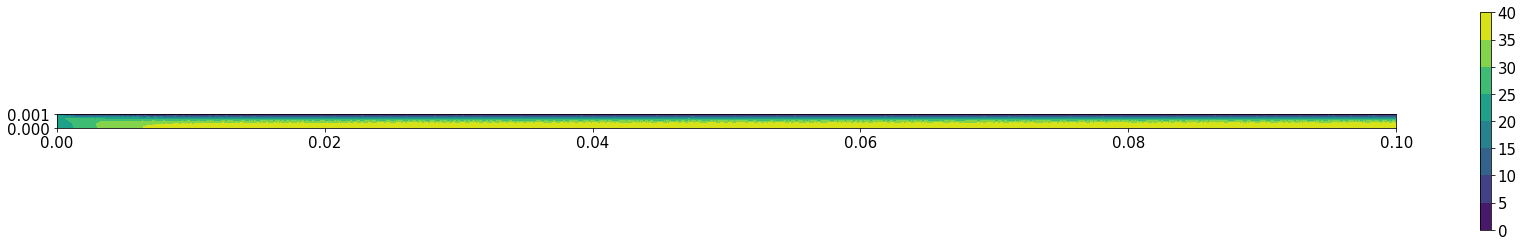

In [211]:
fig, ax = plt.subplots(1, 1, figsize=(30, 4))
plt.contourf(xx, yy, zz)
plt.axis('scaled')
plt.colorbar()
plt.show()

### Comparison to Analytical Solution ###

Using the <b> Hagen-Poisseuille Law <b/>
    
$$ u_z(r) = -\frac{dp}{dz} \left( \frac{R^2-r^2}{4 \mu}\right) $$
    
Using:
    $$ \frac{dp}{dz} \sim \frac{\Delta p}{L} = 128 \frac{\mu L Q}{\pi d^4} $$ 
    
Where $L$ is the length of the pipe, $Q$ is the volumentric flow rate, and $d$ is the diameter of the pipe. Assuming incompressible flow, $Q = uA = u\pi r^2$.
    
At T = 1600 K, $\mu = 5.457 \times 10^{-5} \: \mathrm{kg \:m^{-1}s^{-1}}$.
    
Substituting gives $\Delta p / L = -8731.2 \: \mathrm{Pa \: m^{-1}}$
    
Sources:
    
https://kparker.bg-research.cc.ic.ac.uk/homepage/Mechanics%20of%20the%20Circulation/Chap_05/_Chapter_05.htm
    
https://www.engineeringtoolbox.com/dry-air-properties-d_973.html

In [212]:
R = 0.001 # m
L = 0.1 # m
dpdz = -8731.2 # Pa m-1
mu = 5.457e-5
u_analytical = -dpdz * (R**2 - yy[:,0]**2)/(4*mu)

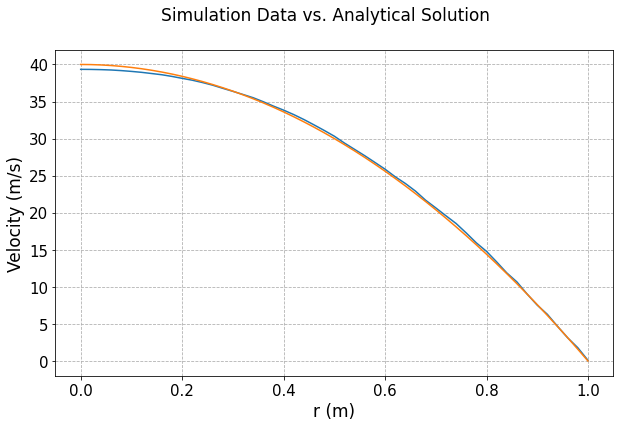

In [214]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
ax.plot(yy[:,0]/R, zz[:,-1])
ax.plot(yy[:,0]/R, u_analytical)
ax.grid(visible=True, which='major', linestyle='--')
ax.set_xlabel('r (m)')
ax.set_ylabel('Velocity (m/s)')
fig.suptitle('Simulation Data vs. Analytical Solution')
plt.show()

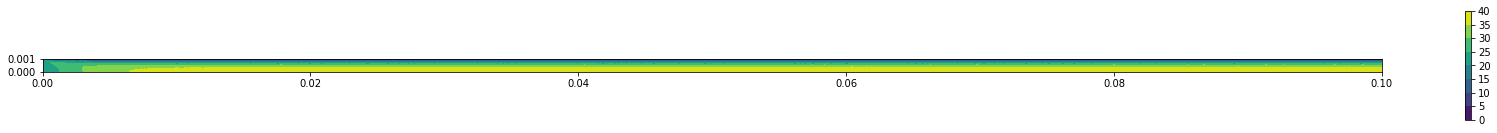